# This is the classifier for the butterfly dataset

Below there is the machine learning workflow pipeline

Import packages

In [15]:
import mlcroissant as mlc
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1. Point to a local or remote Croissant file
url = "https://huggingface.co/api/datasets/fashion_mnist/croissant"
# 2. Inspect metadata
print(mlc.Dataset(url).metadata.to_json())

  -  [Metadata(fashion_mnist)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.
  -  [Metadata(fashion_mnist)] Property "https://schema.org/datePublished" is recommended, but does not exist.
  -  [Metadata(fashion_mnist)] Property "https://schema.org/version" is recommended, but does not exist.


{'@context': {'@language': 'en', '@vocab': 'https://schema.org/', 'citeAs': 'cr:citeAs', 'column': 'cr:column', 'conformsTo': 'dct:conformsTo', 'cr': 'http://mlcommons.org/croissant/', 'data': {'@id': 'cr:data', '@type': '@json'}, 'dataBiases': 'cr:dataBiases', 'dataCollection': 'cr:dataCollection', 'dataType': {'@id': 'cr:dataType', '@type': '@vocab'}, 'dct': 'http://purl.org/dc/terms/', 'extract': 'cr:extract', 'field': 'cr:field', 'fileProperty': 'cr:fileProperty', 'fileObject': 'cr:fileObject', 'fileSet': 'cr:fileSet', 'format': 'cr:format', 'includes': 'cr:includes', 'isLiveDataset': 'cr:isLiveDataset', 'jsonPath': 'cr:jsonPath', 'key': 'cr:key', 'md5': 'cr:md5', 'parentField': 'cr:parentField', 'path': 'cr:path', 'personalSensitiveInformation': 'cr:personalSensitiveInformation', 'recordSet': 'cr:recordSet', 'references': 'cr:references', 'regex': 'cr:regex', 'repeated': 'cr:repeated', 'replace': 'cr:replace', 'sc': 'https://schema.org/', 'separator': 'cr:separator', 'source': 'cr

In [3]:
# 3. Use Croissant dataset in your ML workload
builder = tfds.dataset_builders.CroissantBuilder(jsonld=url, file_format='array_record')
builder.download_and_prepare()

  -  [Metadata(fashion_mnist)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.
  -  [Metadata(fashion_mnist)] Property "https://schema.org/datePublished" is recommended, but does not exist.
  -  [Metadata(fashion_mnist)] Property "https://schema.org/version" is recommended, but does not exist.


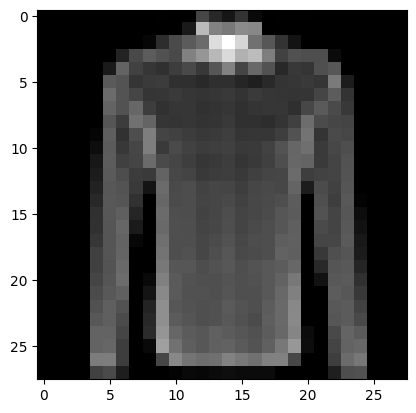

                                 fashion_mnist/image  fashion_mnist/label
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...                    6
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...                    2
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...                    2
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...                    0
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [1, 1, 1], ...                    0
                                 fashion_mnist/image  fashion_mnist/label
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...                    3
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...                    7
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...                    8
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...                    7
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...                    6


In [16]:
# 4. Split for training/testing
train, test = builder.as_data_source(split=['default[:80%]', 'default[80%:]'])
# 5. Display train and test
# use pandas to display the data
train_df = pd.DataFrame(train)
image_rgb = np.array(train_df.loc[0, 'fashion_mnist/image'])

# Display the image
plt.imshow(image_rgb)
plt.show()
test_df = pd.DataFrame(test)
print(train_df.head())
print(test_df.head())